In [65]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
from sys import getsizeof
import pandas as pd
import seaborn as sn


In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

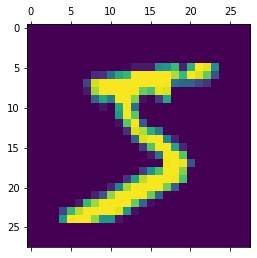

In [17]:
plt.matshow(x_train[0])

In [19]:
y_train[0]

5

In [20]:
# We are going to normalize the data by dividing by 255

X_train = x_train/255
X_test = x_test/255

In [31]:
# size of the array before normalization in bytes
getsizeof(x_train[0])

# size of the array after normalization in bytes
getsizeof(X_train[0])
# conclusion the memory occupied by the array does not change after normalization,
# However the size changes, thus affecting the number of input neurons we need 

112

In [37]:
# Now we flattern the data 
# reshape(row, col)

X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

In [42]:
# Lets build the neural net 
model = keras.Sequential([keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')])

2021-08-22 16:04:55.149462: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [43]:
#we compile the neural net
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [62]:
#We fit the model 
model.fit(X_train_flat, y_train, epochs =10)




Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2161 - accuracy: 0.9396
Epoch 2/10
1875/1875 [==============================] - 2s 957us/step - loss: 0.2162 - accuracy: 0.9398
Epoch 3/10
1875/1875 [==============================] - 2s 927us/step - loss: 0.2163 - accuracy: 0.9391
Epoch 4/10
1875/1875 [==============================] - 2s 917us/step - loss: 0.2164 - accuracy: 0.9392
Epoch 5/10
1875/1875 [==============================] - 2s 922us/step - loss: 0.2161 - accuracy: 0.9391
Epoch 6/10
1875/1875 [==============================] - 2s 912us/step - loss: 0.2157 - accuracy: 0.9399
Epoch 7/10
1875/1875 [==============================] - 2s 941us/step - loss: 0.2161 - accuracy: 0.9394
Epoch 8/10
1875/1875 [==============================] - 2s 897us/step - loss: 0.2161 - accuracy: 0.9392
Epoch 9/10
1875/1875 [==============================] - 2s 919us/step - loss: 0.2159 - accuracy: 0.9395
Epoch 10/10
1875/1875 [==============================] - 2s 902us/

In [63]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 0s 726us/step - loss: 0.3239 - accuracy: 0.9231


[0.32394641637802124, 0.9230999946594238]

Text(69.0, 0.5, 'Truth')

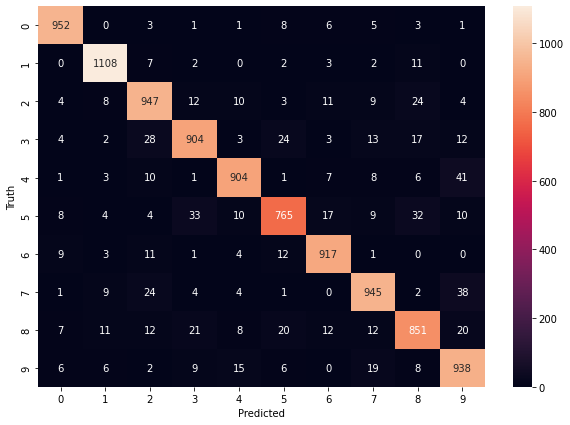

In [66]:
y_predicted = model.predict(X_test_flat)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')